# Lab 2:  Manipulating data frames

In this lab, we will learn some common methods for manipulating DataFrames:
   * *slice*: extract part of a DataFrame
   * *sort*: sort the rows of a DataFrame by one of the columns
   * *group*: combine rows in a DataFrame in a calculation
   
Two other manipulation techniques which we are *not* covering are:
   * *pivot*:  rearrange the DataFrame
   * *join*:  attach two or more DataFrames together into a single DataFrame

### Section 1:  Loading the data

This lab explores the FBI NICS Firearms Background Check data, which records the number of background check made.  A background check must be made prior to *some* sales of firearms (a big exception is private sales.)  This data is often used as the best approximation of total gun sales at a given time.

BuzzFeed converts the PDF data supplied by the FBI to CSV files.

For more information on the dataset: [https://github.com/BuzzFeedNews/nics-firearm-background-checks](https://github.com/BuzzFeedNews/nics-firearm-background-checks)

For a direct link to the dataset:  [https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv)

Import the necessary libraries:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Our data set has a lot of columns, so the following code ensures they are all displayed.

In [3]:
pd.set_option('display.max_columns', None)

Read the CSV file into a dataframe called `guns`, and display the dataframe to make sure it was loaded correctly.

In [4]:
guns = pd.read_csv("https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv")

In [5]:
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-02,Alabama,31803.0,512.0,20970.0,16026.0,1548.0,959,0.0,18.0,14.0,2.0,1966.0,791.0,7.0,19.0,0.0,0.0,0.0,0.0,35.0,27.0,6.0,2.0,5.0,0.0,74710
1,2021-02,Alaska,222.0,1.0,3055.0,2564.0,375.0,189,0.0,3.0,0.0,0.0,122.0,79.0,1.0,31.0,15.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,6667
2,2021-02,Arizona,9290.0,1159.0,20530.0,9991.0,1754.0,1114,0.0,10.0,3.0,3.0,1059.0,404.0,1.0,132.0,9.0,1.0,0.0,0.0,19.0,15.0,2.0,0.0,0.0,0.0,45496
3,2021-02,Arkansas,3123.0,1152.0,7068.0,5289.0,448.0,390,8.0,7.0,13.0,2.0,771.0,623.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,18916
4,2021-02,California,16025.0,11953.0,40789.0,27915.0,6499.0,0,0.0,2.0,0.0,0.0,508.0,275.0,6.0,1669.0,743.0,71.0,0.0,0.0,9126.0,3416.0,709.0,60.0,18.0,0.0,119784


Convert the type of the `month` column into a `datetime` object, and display `guns` to make sure it was successful.

In [6]:
guns["month"] = pd.to_datetime(guns["month"])

In [7]:
guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-02-01,Alabama,31803.0,512.0,20970.0,16026.0,1548.0,959,0.0,18.0,14.0,2.0,1966.0,791.0,7.0,19.0,0.0,0.0,0.0,0.0,35.0,27.0,6.0,2.0,5.0,0.0,74710
1,2021-02-01,Alaska,222.0,1.0,3055.0,2564.0,375.0,189,0.0,3.0,0.0,0.0,122.0,79.0,1.0,31.0,15.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,6667
2,2021-02-01,Arizona,9290.0,1159.0,20530.0,9991.0,1754.0,1114,0.0,10.0,3.0,3.0,1059.0,404.0,1.0,132.0,9.0,1.0,0.0,0.0,19.0,15.0,2.0,0.0,0.0,0.0,45496
3,2021-02-01,Arkansas,3123.0,1152.0,7068.0,5289.0,448.0,390,8.0,7.0,13.0,2.0,771.0,623.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0,0.0,18916
4,2021-02-01,California,16025.0,11953.0,40789.0,27915.0,6499.0,0,0.0,2.0,0.0,0.0,508.0,275.0,6.0,1669.0,743.0,71.0,0.0,0.0,9126.0,3416.0,709.0,60.0,18.0,0.0,119784


There was no day in the original `month` column.  What happens to the day once we convert this column into a `datetime` object?

### Section 2: Slicing

*Slicing* means accessing or extracting part of a DataFrame.  We have actually already used slicing.  For example, what does the code below get from the DataFrame? 

In [8]:
guns["handgun"]

0        20970.0
1         3055.0
2        20530.0
3         7068.0
4        40789.0
          ...   
14735       14.0
14736       65.0
14737      149.0
14738       25.0
14739       45.0
Name: handgun, Length: 14740, dtype: float64

We can extract multiple columns by putting them in a list.  For example, to get the hand gun and long gun permit check columns.

In [9]:
guns[['handgun',"long_gun","multiple"]]

,handgun,long_gun,multiple
0,20970.0,16026.0,959
1,3055.0,2564.0,189
2,20530.0,9991.0,1114
3,7068.0,5289.0,390
4,40789.0,27915.0,0
...,...,...,...
14735,14.0,2.0,8
14736,65.0,286.0,8
14737,149.0,251.0,5
14738,25.0,214.0,2


Suppose we want the number of long gun permit checks made in Arizona in January 2021.  We can access exactly that row and column using the `.loc[]` command.

In [10]:
guns.loc[2,"long_gun"]

9991.0

Can you figure out what 2 is?  

The two coordinates for `.loc` are always the row or rows, then the column or columns, in that order.  Thus the 2 above is the row index (shown on the very left when the `guns` DataFrame is displayed) for January 2021, Arizona.

Use `.loc` to extract the state at row index 15.

In [11]:
guns.loc[15,"state"]

'Indiana'

Is this the 16th state alphabetically? (16th since the row index begins at 0)  Why or why not?

To get a range of consecutive rows we use the pattern first_row_index:last_row_index.  Just using a : by itself will get either all rows or all columns, depending on whether it is used first or second, respectively.  For example, the following code gets all columns for rows with indices between 10 and 20 inclusive.

In [12]:
guns.loc[10:20,:]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
10,2021-02-01,Georgia,37243.0,0.0,21523.0,10215.0,1122.0,727,0.0,18.0,8.0,3.0,1495.0,705.0,15.0,14.0,0.0,0.0,0.0,0.0,18.0,12.0,2.0,0.0,0.0,0.0,73120
11,2021-02-01,Guam,0.0,0.0,190.0,70.0,34.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301
12,2021-02-01,Hawaii,1504.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1507
13,2021-02-01,Idaho,6846.0,0.0,6973.0,5631.0,762.0,385,0.0,2.0,3.0,1.0,261.0,242.0,1.0,63.0,16.0,1.0,0.0,0.0,18.0,16.0,2.0,0.0,0.0,0.0,21223
14,2021-02-01,Illinois,18820.0,846252.0,24290.0,11338.0,0.0,1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902020
15,2021-02-01,Indiana,902.0,150662.0,25161.0,14378.0,2063.0,998,18.0,3.0,2.0,1.0,513.0,276.0,26.0,19.0,0.0,1.0,0.0,0.0,62.0,57.0,17.0,0.0,2.0,1.0,195162
16,2021-02-01,Iowa,15966.0,11779.0,204.0,2462.0,65.0,2,3.0,0.0,1.0,0.0,1.0,26.0,0.0,44.0,13.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,30572
17,2021-02-01,Kansas,2083.0,7.0,7573.0,5810.0,865.0,430,0.0,7.0,3.0,2.0,453.0,201.0,8.0,41.0,13.0,3.0,0.0,0.0,12.0,16.0,0.0,0.0,1.0,0.0,17528
18,2021-02-01,Kentucky,1304.0,352938.0,12171.0,8806.0,609.0,623,0.0,23.0,9.0,1.0,1223.0,730.0,1.0,12.0,7.0,0.0,0.0,0.0,21.0,18.0,2.0,0.0,1.0,0.0,378499
19,2021-02-01,Louisiana,2435.0,204.0,13373.0,7560.0,1094.0,680,0.0,7.0,9.0,2.0,853.0,404.0,16.0,0.0,0.0,0.0,0.0,0.0,20.0,10.0,1.0,0.0,1.0,0.0,26669


Can you figure out how to extract rows with indices 50 to 100 inclusive, and the `month`, `state` and `permit` columns?  

Hint: You can also use a list of columns with `.loc`.

In [14]:
guns.loc[50:100,["month"]]

,month
50,2021-02-01
51,2021-02-01
52,2021-02-01
53,2021-02-01
54,2021-02-01
55,2021-01-01
56,2021-01-01
57,2021-01-01
58,2021-01-01
59,2021-01-01


<details> <summary>Answer:</summary>
<code>
guns.loc[50:100,["month","state","permit"]]
</code>
</details>

### Section 3: Sorting

The following code sorts `guns` by the `state` column in ascending and stores the new DataFrame in the variable `sorted_guns`.

In [15]:
sorted_guns = guns.sort_values("state", ascending = False)
sorted_guns.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14739,1998-11-01,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
7644,2009-08-01,Wyoming,523.0,NaN,1106.0,1746.0,12.0,56,19.0,2.0,2.0,NaN,95.0,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3800
3189,2016-05-01,Wyoming,868.0,0.0,1497.0,1671.0,97.0,89,3.0,1.0,4.0,0.0,125.0,137.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,0.0,6.0,1.0,4504
13914,2000-02-01,Wyoming,268.0,NaN,906.0,1729.0,NaN,53,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2956
879,2019-11-01,Wyoming,251.0,16.0,2094.0,2425.0,169.0,129,0.0,3.0,5.0,0.0,141.0,163.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,1.0,1.0,0.0,5411
4509,2014-05-01,Wyoming,931.0,NaN,1732.0,1972.0,68.0,112,0.0,0.0,3.0,0.0,144.0,224.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,5187
5444,2012-12-01,Wyoming,232.0,NaN,4157.0,4722.0,117.0,263,0.0,1.0,3.0,0.0,148.0,233.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9876
7699,2009-07-01,Wyoming,621.0,NaN,992.0,1355.0,16.0,59,29.0,3.0,4.0,NaN,105.0,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3421
5719,2012-07-01,Wyoming,321.0,NaN,1413.0,1653.0,36.0,78,1.0,0.0,2.0,0.0,154.0,243.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901
11714,2003-06-01,Wyoming,178.0,NaN,602.0,1085.0,NaN,45,6.0,7.0,25.0,NaN,89.0,252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2289


The original DataFrame was sorted by `month` (the date) first, then the state.  Is this DataFrame sorted by `state`, then `month`?

To sort by two or more columns, pass in a list of the columns in the order you want to sort by (ex. the first column will take priority in the sort, then the second column, etc.).

In [16]:
sorted_guns2 = guns.sort_values(["state","month"])
sorted_guns2.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14685,1998-11-01,Alabama,0.0,NaN,449.0,603.0,NaN,10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062
14630,1998-12-01,Alabama,0.0,NaN,10118.0,25120.0,NaN,268,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35506
14575,1999-01-01,Alabama,0.0,NaN,7516.0,10311.0,NaN,222,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18049
14520,1999-02-01,Alabama,0.0,NaN,9630.0,10654.0,NaN,299,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20583
14465,1999-03-01,Alabama,0.0,NaN,9151.0,9991.0,NaN,282,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19424
14410,1999-04-01,Alabama,0.0,NaN,7371.0,7218.0,NaN,234,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14823
14355,1999-05-01,Alabama,0.0,NaN,7005.0,6832.0,NaN,206,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14043
14300,1999-06-01,Alabama,0.0,NaN,7010.0,7393.0,NaN,248,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14651
14245,1999-07-01,Alabama,0.0,NaN,6770.0,7813.0,NaN,212,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14795
14190,1999-08-01,Alabama,0.0,NaN,7123.0,9709.0,NaN,263,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17095


Repeat the code above, but add the parameter `ascending = False` to the function `sort_values()`.

In [17]:
sorted_guns3 = guns.sort_values(["state","month"], ascending = False)
sorted_guns3.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
54,2021-02-01,Wyoming,682.0,35.0,2724.0,2320.0,226.0,150,2.0,1.0,3.0,0.0,112.0,104.0,1.0,13.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,6382
109,2021-01-01,Wyoming,654.0,12.0,4039.0,3697.0,338.0,197,4.0,1.0,2.0,1.0,156.0,140.0,2.0,12.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,1.0,0.0,0.0,9266
164,2020-12-01,Wyoming,904.0,16.0,3998.0,4137.0,280.0,188,0.0,0.0,0.0,2.0,100.0,102.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,9736
219,2020-11-01,Wyoming,768.0,25.0,3685.0,4452.0,308.0,248,0.0,1.0,2.0,1.0,117.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,9719
274,2020-10-01,Wyoming,955.0,7.0,2616.0,3207.0,210.0,166,0.0,5.0,1.0,0.0,134.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,1.0,0.0,1.0,0.0,7464
329,2020-09-01,Wyoming,734.0,14.0,2722.0,3247.0,186.0,216,0.0,4.0,2.0,0.0,128.0,166.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,7427
384,2020-08-01,Wyoming,522.0,14.0,3080.0,3188.0,220.0,128,0.0,1.0,1.0,0.0,110.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,7370
439,2020-07-01,Wyoming,818.0,7.0,3237.0,2950.0,207.0,147,1.0,0.0,1.0,0.0,104.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,7598
494,2020-06-01,Wyoming,359.0,3.0,3966.0,2946.0,238.0,170,0.0,1.0,4.0,2.0,97.0,103.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,0.0,0.0,0.0,7901
549,2020-05-01,Wyoming,101.0,14.0,2902.0,2591.0,255.0,163,0.0,2.0,0.0,0.0,94.0,139.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,0.0,0.0,0.0,6272


<details> <summary>Answer:</summary>
<code>
sorted_guns3 = guns.sort_values(["state","month"], ascending = False)
sorted_guns3.head(10)
</code>
</details>

What do you think this parameter does?

### Section 4: Grouping

What if we wanted to find the mean number of handgun checks for each state?  Our usual method of filtering would take a while.  Instead we will use the *group by* process, which:
- *splits* the data into groups based on some criteria
- *applies* a function to each group independently
- *combines* the results into a data structure

The splitting step is done by the function `groupby()` and a second function, like `mean()`, is applied to the groups.

In [19]:
guns.mean()

<ipython-input-19-d40b9e672dd3>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  guns.mean()


permit                        7222.366540
permit_recheck                8233.017586
handgun                       7010.837160
long_gun                      7958.468379
other                          534.771631
multiple                       297.850543
admin                           53.117483
prepawn_handgun                  5.166680
prepawn_long_gun                 7.562798
prepawn_other                    0.372863
redemption_handgun             444.792891
redemption_long_gun            571.480584
redemption_other                 2.571642
returned_handgun                56.205163
returned_long_gun               12.826136
returned_other                   2.881572
rentals_handgun                  0.149461
rentals_long_gun                 0.161039
private_sale_handgun            29.227972
private_sale_long_gun           21.621578
private_sale_other               3.356044
return_to_seller_handgun         0.920507
return_to_seller_long_gun        0.895704
return_to_seller_other           0

In [22]:
grouped_guns = guns.groupby("state").count()
grouped_guns["handgun"]

state
Alabama                 268
Alaska                  268
Arizona                 268
Arkansas                268
California              268
Colorado                268
Connecticut             268
Delaware                268
District of Columbia    268
Florida                 268
Georgia                 268
Guam                    268
Hawaii                  268
Idaho                   268
Illinois                268
Indiana                 268
Iowa                    268
Kansas                  268
Kentucky                268
Louisiana               268
Maine                   268
Mariana Islands         259
Maryland                268
Massachusetts           268
Michigan                268
Minnesota               268
Mississippi             268
Missouri                268
Montana                 268
Nebraska                268
Nevada                  268
New Hampshire           268
New Jersey              268
New Mexico              268
New York                268
North Carolina

If we only wanted to see the `handgun` column, we can use:


In [19]:
guns.groupby("state").mean()["handgun"]

state
Alabama                 10815.183521
Alaska                   2089.528090
Arizona                  9358.464419
Arkansas                 4740.996255
California              28756.445693
Colorado                12684.513109
Connecticut              4125.853933
Delaware                 1124.363296
District of Columbia       40.044944
Florida                 31566.385768
Georgia                 10838.808989
Guam                       48.101124
Hawaii                      0.011236
Idaho                    2593.621723
Illinois                12824.554307
Indiana                 11635.550562
Iowa                      100.232210
Kansas                   4562.112360
Kentucky                 8548.543071
Louisiana                8693.670412
Maine                    2219.921348
Mariana Islands             2.306202
Maryland                 3059.209738
Massachusetts            3267.760300
Michigan                 6289.992509
Minnesota                5973.217228
Mississippi              6011.76

Other functions we can use with `groupby()` are:
- `mean()` : Compute mean of groups
- `sum()` : Compute sum of group values
- `size()` : Compute group sizes
- `count()` : Compute count of group
- `std()` : Standard deviation of groups
- `var()` : Compute variance of groups
- `describe()` : Generates descriptive statistics
- `min()` : Compute min of group values
- `max()` : Compute max of group values

For example, what is the standard deviation of long gun background checks in all states?

In [21]:
grouped_std_guns = guns.groupby("state").std()
grouped_std_guns["long_gun"]

state
Alabama                  6401.812249
Alaska                    839.431566
Arizona                  2651.616244
Arkansas                 3645.316337
California              11055.105769
Colorado                 4273.234647
Connecticut              1618.729486
Delaware                  580.393009
District of Columbia       13.130278
Florida                  8454.377302
Georgia                  5221.726277
Guam                       20.285134
Hawaii                      1.731433
Idaho                    1467.074009
Illinois                 4001.156125
Indiana                  5065.046757
Iowa                     1674.902209
Kansas                   2416.964483
Kentucky                 4228.287461
Louisiana                5479.729677
Maine                    1414.081829
Mariana Islands             3.645380
Maryland                 2082.803488
Massachusetts            1024.490500
Michigan                 5741.136429
Minnesota                4185.210080
Mississippi              4561.95

<details> <summary>Answer:</summary>
<code>
guns.groupby("state").std()["long_gun"]
</code>
</details>

Notice that the output of `guns.groupby("state").mean()["handgun"]` looks a lot like the output of `value_counts()`.  We can use it to make a bar plot.  Try it below.

<AxesSubplot:xlabel='state'>

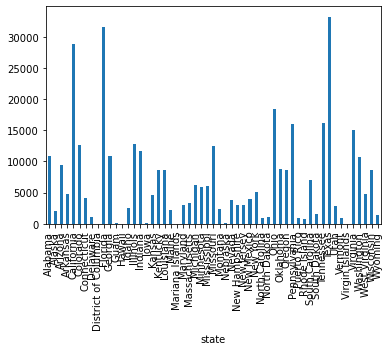

In [28]:
grouped_guns["handgun"].plot(kind = "bar")

<details> <summary>Answer:</summary>
guns.groupby("state").mean()["handgun"].plot(kind = "bar")
</details>

Which state had the most background checks for handguns?

We can also use `groupby` for dates.  For example, to sum by month:

In [29]:
guns.groupby(guns["month"].dt.month).sum()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,,,,,
1,10152622.0,3219613.0,9289707.0,9016125.0,395221.0,371552,60558.0,6028.0,9253.0,292.0,496584.0,597336.0,1939.0,25039.0,5742.0,890.0,61.0,47.0,18527.0,11661.0,2193.0,445.0,423.0,42.0,33681900
2,9130301.0,1497775.0,9551125.0,8960418.0,316252.0,431799,64063.0,5939.0,8722.0,217.0,641162.0,834816.0,1669.0,16977.0,3882.0,508.0,37.0,44.0,9954.0,7610.0,985.0,295.0,288.0,41.0,31484879
3,10653241.0,1652947.0,10293981.0,9862566.0,373600.0,421363,61504.0,5547.0,7893.0,216.0,466841.0,577778.0,1580.0,19210.0,4426.0,618.0,40.0,42.0,11497.0,9322.0,1356.0,340.0,341.0,48.0,34426297
4,9206825.0,1683297.0,8206728.0,7929345.0,307103.0,341814,51698.0,5075.0,7034.0,236.0,411611.0,498079.0,1403.0,17495.0,4064.0,638.0,31.0,46.0,9696.0,8000.0,1112.0,312.0,316.0,46.0,28692004
5,8484619.0,2135061.0,7373519.0,6685072.0,278996.0,334546,49364.0,4951.0,6755.0,196.0,418713.0,475262.0,1325.0,18453.0,4088.0,603.0,36.0,31.0,9329.0,6760.0,872.0,280.0,326.0,47.0,26289204
6,8326182.0,2275968.0,7626819.0,6761230.0,322982.0,347706,49416.0,5003.0,6779.0,191.0,430841.0,480900.0,1381.0,20083.0,4315.0,819.0,29.0,39.0,10591.0,7686.0,1289.0,335.0,338.0,49.0,26680971
7,8200091.0,2242397.0,7244376.0,6770510.0,303064.0,313035,80951.0,5179.0,7024.0,191.0,439528.0,498450.0,1351.0,20189.0,4162.0,1229.0,28.0,25.0,9415.0,6579.0,1154.0,314.0,312.0,33.0,26149587
8,8039603.0,2064011.0,7570321.0,8855790.0,301602.0,316600,58506.0,5426.0,7501.0,194.0,467141.0,583545.0,1492.0,21420.0,4657.0,1518.0,41.0,37.0,10153.0,7810.0,1249.0,358.0,376.0,47.0,28319398
9,7779626.0,1842885.0,7183707.0,9929240.0,288760.0,313836,63012.0,5489.0,7453.0,190.0,466713.0,636103.0,1499.0,20441.0,4636.0,1227.0,47.0,41.0,10136.0,8672.0,1205.0,354.0,402.0,45.0,28565719


Can you make a bar chart of the number of handgun permit issued each month?

Hint 1:  You may want to save the above DataFrame in a variable first.

Hint 2:  You do not need to use `value_counts()` since the data is already grouped.  Instead, call the bar plot function on the `handgun` column.

Text(0, 0.5, '# of background checks')

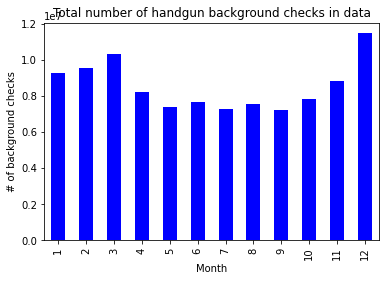

In [31]:
grouped_month_guns = guns.groupby(guns["month"].dt.month).sum()
grouped_month_guns["handgun"].plot(kind = "bar", color = "blue")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")

<details><summary>Answer:</summary>
    <code>
guns_grouped_by_month = guns.groupby(guns["month"].dt.month).sum()
guns_grouped_by_month["handgun"].plot(kind = "bar", color = "blue")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")
</code>
</details>

Which month had highest total number of background checks?  The lowest?

Let's plot the total number of background checks for both handguns and long guns on the same graph.  To do this, use the list `["handgun","long_gun"]` of the two columns instead of the just `"month"`

Text(0, 0.5, '# of background checks')

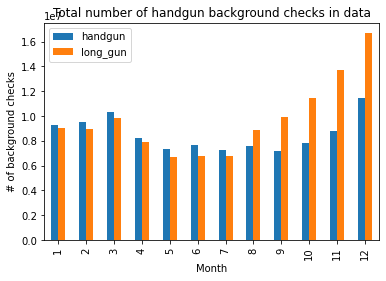

In [34]:
grouped_month_guns = guns.groupby(guns["month"].dt.month).sum()
grouped_month_guns[["handgun","long_gun"]].plot(kind = "bar")
plt.title("Total number of handgun background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")

<details><summary>Answer:</summary>
    <code>
guns_grouped_by_month[["handgun","long_gun"]].plot(kind = "bar")
plt.title("Total number of background checks in data")
plt.xlabel("Month")
plt.ylabel("# of background checks")
</code>
</details>

Are there any significant differences in background checks between handguns and long guns?  Why might this be?  (Hint:  hunting season is usually in the fall)

### Section 5:  Putting it all together

Suppose we want to make a line plot showing how the total number of background checks (`totals` column) has changed in New York state in the last 10 years (2010 - 2020). 

Creating this plot will involve several steps.  First think of what these steps are, and then think of what a logical order for them would be.  You may want to write or type up this list to keep track as you write the code for it.

- filter to only have new york state
- filter to only have 2010-2020

In [35]:
ny_filter = guns["state"] == "New York"
year_filter_lower = guns["month"].dt.year >= 2010
year_filter_upper = guns["month"].dt.year <= 2020

guns2 = guns[ny_filter & year_filter_lower & year_filter_upper]
guns2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
89,2020-12-01,New York,3261.0,1910.0,10486.0,24664.0,3145.0,367,0.0,1.0,0.0,2.0,38.0,56.0,8.0,63.0,128.0,1.0,0.0,10.0,265.0,399.0,52.0,2.0,11.0,1.0,44870
144,2020-11-01,New York,3203.0,1765.0,10393.0,28951.0,3768.0,405,0.0,0.0,1.0,2.0,41.0,45.0,18.0,97.0,129.0,3.0,2.0,9.0,261.0,453.0,55.0,8.0,13.0,1.0,49623
199,2020-10-01,New York,4243.0,2183.0,10541.0,28281.0,3588.0,513,0.0,2.0,4.0,3.0,44.0,49.0,3.0,61.0,106.0,2.0,6.0,12.0,340.0,409.0,26.0,6.0,10.0,2.0,50434
254,2020-09-01,New York,3389.0,1771.0,9928.0,25663.0,3370.0,465,0.0,2.0,1.0,0.0,56.0,49.0,7.0,68.0,128.0,0.0,1.0,9.0,326.0,385.0,44.0,8.0,11.0,3.0,45684
309,2020-08-01,New York,3065.0,1739.0,10163.0,22460.0,3426.0,510,0.0,0.0,2.0,1.0,47.0,40.0,8.0,80.0,118.0,3.0,4.0,6.0,325.0,375.0,52.0,6.0,11.0,2.0,42443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,2010-05-01,New York,1955.0,NaN,4774.0,8957.0,224.0,73,8.0,0.0,0.0,0.0,1.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16001
7129,2010-04-01,New York,2670.0,NaN,5313.0,11554.0,270.0,84,9.0,0.0,0.0,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19906
7184,2010-03-01,New York,2975.0,NaN,6093.0,12810.0,380.0,91,7.0,0.0,0.0,0.0,1.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22365
7239,2010-02-01,New York,2474.0,NaN,4702.0,10776.0,272.0,62,14.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18302


- group by year
- sum over groups

In [42]:
grouped_guns2 = guns2.groupby(guns2["month"].dt.year).sum()
grouped_guns2

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,,,,,
2010,30047.0,0.0,59848.0,147539.0,2950.0,909,121.0,1.0,1.0,0.0,3.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241495
2011,37459.0,0.0,65774.0,163547.0,3711.0,1032,228.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271837
2012,30529.0,0.0,82884.0,214474.0,6667.0,1599,2341.0,0.0,0.0,0.0,3.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338619
2013,28505.0,0.0,108508.0,202024.0,7079.0,1832,4143.0,2.0,6.0,0.0,61.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,379.0,318.0,16.0,2.0,11.0,0.0,353064
2014,76653.0,0.0,96738.0,180565.0,6510.0,1637,0.0,6.0,7.0,1.0,90.0,211.0,14.0,0.0,0.0,0.0,0.0,0.0,1699.0,1144.0,61.0,40.0,51.0,0.0,365427
2015,39889.0,0.0,107532.0,184216.0,7360.0,1800,0.0,7.0,10.0,0.0,146.0,184.0,11.0,1.0,2.0,1.0,0.0,0.0,2774.0,1879.0,99.0,45.0,88.0,4.0,346048
2016,49646.0,1846.0,133285.0,197670.0,12500.0,2466,0.0,12.0,11.0,1.0,201.0,263.0,33.0,1.0,21.0,1.0,11.0,16.0,3751.0,2607.0,242.0,89.0,82.0,17.0,404772
2017,34301.0,16545.0,124253.0,181692.0,13149.0,2274,0.0,9.0,14.0,7.0,347.0,283.0,42.0,211.0,406.0,3.0,36.0,56.0,4925.0,3455.0,269.0,105.0,101.0,12.0,382495
2018,34512.0,20387.0,108936.0,164530.0,16203.0,2545,0.0,11.0,11.0,21.0,748.0,464.0,75.0,333.0,626.0,17.0,50.0,49.0,4611.0,3965.0,282.0,110.0,120.0,8.0,358614


- pull out totals column
- line plot

Text(0, 0.5, 'Number of Checks')

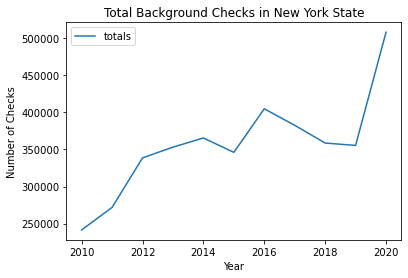

In [43]:
grouped_guns2.plot(y = "totals")
plt.title("Total Background Checks in New York State")
plt.xlabel("Year")
plt.ylabel("Number of Checks")

<details><summary>One possible order</summary>
1. filter the DataFrame to make a new DataFrame with only data from 2010-2020 and New York state (this can also be done as two consecutive steps in either order)<br>
2. use `groupby()` to group by the months of each year and apply the `sum()` function<br>
3. make a line plot with the year on the x axis and totals on the y axis
</details>

Note that when you make the line plot, the year will be the row index as a result of using `groupby()`.  This just means it will automatically be used for the x axis in the line plot, and you do not have to pass it in as a parameter.

Now try writing this code without looking at any of the hints!  (But if you get stuck, they are there)

<details><summary>One way to do the filtering</summary>
<code>
year_filter_lower = guns["month"].dt.year >= 2010
year_filter_upper = guns["month"].dt.year <= 2020
ny_filter = guns["state"] == "New York"

guns2 = guns[year_filter_lower & year_filter_upper & ny_filter]
guns2
</code>
</details>

<details><summary>Grouping, assuming the filtered DataFrame is `guns2`:</summary>
<code>
grouped_guns2 = guns2.groupby(guns2["month"].dt.year).sum()
grouped_guns2
</code>
</details>

<details><summary>Plotting, assuming the filtered and grouped DataFrame is `grouped_guns2`:</summary>
<code>
grouped_guns2 = guns2.groupby(guns2["month"].dt.year).sum()
grouped_guns2
</code>
</details>

How has the total number of background checks for guns in New York state changed from 2010-2020?

#### Optional challenge questions:
* Find the row with the highest total number of background checks.  <details><summary>Hint:</summary>
Use `idxmax()` from MAT 128 or mentioned last lab.
</details>
* Plot a histogram of the distribution over all states of the median number of long gun background checks made in May in the last five years.  That is, your histogram will contain one data point for each state, which is the median number of long gun background checks made in that state in the last 5 years.
* Plot the same histogram as the previous challenge, but for November.  How does it compare to the May histogram?  Does the shape of the distribution change or just the magnitude?